In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [2]:
data = pd.read_parquet("datas/final_df_day_2014_訓練資料.parquet")
# data = pd.read_parquet("datas/final_df_week_2014_訓練資料.parquet")
data.shape

(4261, 160)

In [ ]:
list(data.columns)

##### 模型1--技術面

In [207]:
# 创建XGBoost分类器
model_技術面 = xgb.XGBClassifier(
    n_estimators=50,  # 与原RandomForest保持一致的树数量
    max_depth=40,  # 树的最大深度
    learning_rate=0.05,  # 学习率
    min_child_weight=10,  # 最小子节点权重
    subsample=0.3,  # 训练每棵树时使用的样本比例
    colsample_bytree=1,  # 训练每棵树时使用的特征比例
    objective="binary:logistic",  # 二分类问题
    early_stopping_rounds=50,
    random_state=1,
    reg_alpha=0,  # 若要添加L1正則化
)
# {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.3}
# 划分训练集和测试集
train = data.iloc[:-2500]
test = data.iloc[-2500:-2000]
# train = data.iloc[:1000]
# test = data.iloc[-500:]

predictors_技術面 = [
    "ES_1d_return",
    "ES_5d_return",
    "ES_20d_return",
    "ES_60d_return",
    "ES_120d_return",
    "ES_ma5d",
    "ES_ma20d",
    "ES_ma60d",
    "ES_ma120d",
    "ES_trend5",
    "ES_trend20",
    "ES_trend60",
    "ES_trend120",
    # "FFI_1d_return",
    # "FFI_5d_return",
    # "FFI_20d_return",
    # "FFI_60d_return",
    # "FFI_120d_return",
    # "FFI_ma5d",
    # "FFI_ma20d",
    # "FFI_ma60d",
    # "FFI_ma120d",
    # "FFI_trend5",
    # "FFI_trend20",
    # "FFI_trend60",
    # "FFI_trend120",
    # "VIX_Close",
    # "VIX_1d_return",
    # "VIX_5d_return",
    # "VIX_20d_return",
    # "VIX_60d_return",
    # "VIX_120d_return",
    # "VIX_ma5d",
    # "VIX_ma20d",
    # "VIX_ma60d",
    # "VIX_ma120d",
    # "VIX_trend5",
    # "VIX_trend20",
    # "VIX_trend60",
    # "VIX_trend120",
    # "TWII_1d_return",
    # "TWII_5d_return",
    # "TWII_20d_return",
    # "TWII_60d_return",
    # "TWII_120d_return",
    # "TWII_ma5d",
    # "TWII_ma20d",
    # "TWII_ma60d",
    # "TWII_ma120d",
    # "TWII_trend5",
    # "TWII_trend20",
    # "TWII_trend60",
    # "TWII_trend120",
    # "BRENT_1d_return",
    # "BRENT_5d_return",
    # "BRENT_20d_return",
    # "BRENT_60d_return",
    # "BRENT_120d_return",
    # "BRENT_ma5d",
    # "BRENT_ma20d",
    # "BRENT_ma60d",
    # "BRENT_ma120d",
    # "BRENT_trend5",
    # "BRENT_trend20",
    # "BRENT_trend60",
    # "BRENT_trend120",
    # "USD_1d_return",
    # "USD_5d_return",
    # "USD_20d_return",
    # "USD_60d_return",
    # "USD_120d_return",
    # "USD_ma5d",
    # "USD_ma20d",
    # "USD_ma60d",
    # "USD_ma120d",
    # "USD_trend5",
    # "USD_trend20",
    # "USD_trend60",
    # "USD_trend120",
    # "COPPER_1d_return",
    # "COPPER_5d_return",
    # "COPPER_20d_return",
    # "COPPER_60d_return",
    # "COPPER_120d_return",
    # "COPPER_ma5d",
    # "COPPER_ma20d",
    # "COPPER_ma60d",
    # "COPPER_ma120d",
    # "COPPER_trend5",
    # "COPPER_trend20",
    # "COPPER_trend60",
    # "COPPER_trend120",
    # "GOLD_1d_return",
    # "GOLD_5d_return",
    # "GOLD_20d_return",
    # "GOLD_60d_return",
    # "GOLD_120d_return",
    # "GOLD_ma5d",
    # "GOLD_ma20d",
    # "GOLD_ma60d",
    # "GOLD_ma120d",
    # "GOLD_trend5",
    # "GOLD_trend20",
    # "GOLD_trend60",
    # "GOLD_trend120",
    "ES_atr",
    "ES_k",
    "ES_d",
    "ES_macd",
    "ES_macd_signal",
    "ES_macd_hist",
    "ES_adx",
    "ES_pdi",
    "ES_mdi",
    "ES_cci",
    "ES_chaikin_money_flow",
    "ES_mfi14",
    "ES_williams_r",
    "ES_month",
    "ES_Volume",
    "ES_Open",
    "ES_High",
    "ES_Low",
    # "coreCPI",
    # "coreCPI-月變化",
    # "coreCPI-季變化",
    # "coreCPI-半年變化",
    # "coreCPI-年變化",
    # "fedRate",
    # "fedRate-月變化",
    # "fedRate-季變化",
    # "fedRate-半年變化",
    # "fedRate-年變化",
    # "NonFarm",
    # "NonFarm-MA10",
    # "NonFarm-MA10_日變化",
    # "NonFarm-MA10_月變化",
    # "NonFarm-MA10_季變化",
    # "NonFarm-MA10_半年變化",
    # "NonFarm-MA10_年變化",
    # "PMI",
    # "PMI-月變化",
    # "PMI-季變化",
    # "PMI-半年變化",
    # "PMI-年變化",
    # "T10Y",
    # "T10Y-MA10",
    # "T10Y-MA10_日變化",
    # "T10Y-MA10_月變化",
    # "T10Y-MA10_季變化",
    # "T10Y-MA10_半年變化",
    # "T10Y-MA10_年變化",
    # "T10Y2Y",
    # "T10Y2Y-MA10",
    # "T10Y2Y-MA10_日變化",
    # "T10Y2Y-MA10_月變化",
    # "T10Y2Y-MA10_季變化",
    # "T10Y2Y-MA10_半年變化",
]

# 训练模型
model_技術面.fit(
    train[predictors_技術面],
    train["next_higher"],
    eval_set=[(test[predictors_技術面], test["next_higher"])],  # 添加验证集
    # eval_metric="logloss",  # 评估指标
    verbose=False,  # 显示训练过程
)

# 预测和评估
predictions = model_技術面.predict(test[predictors_技術面])
# 用機率更讚
proba_predictions_技術面 = model_技術面.predict_proba(test[predictors_技術面])
# proba_predictions[proba_predictions>=0.6]=1
# proba_predictions[proba_predictions<0.6]=0
# 打印模型评估报告
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(test["next_higher"], predictions))
print("\nClassification Report:")
print(classification_report(test["next_higher"], predictions))

# 获取特征重要性
feature_importance = pd.DataFrame(
    {"feature": predictors_技術面, "importance": model_技術面.feature_importances_}
)
feature_importance = feature_importance.sort_values("importance", ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))
print("\nTop 10 Most NOT Important Features:")
print(feature_importance.tail(10))


Model Evaluation:
Accuracy: 0.536

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       277
           1       0.48      0.48      0.48       223

    accuracy                           0.54       500
   macro avg       0.53      0.53      0.53       500
weighted avg       0.54      0.54      0.54       500


Top 10 Most Important Features:
           feature  importance
9        ES_trend5    0.048389
22          ES_cci    0.043607
14            ES_k    0.041157
15            ES_d    0.039307
12     ES_trend120    0.037450
28         ES_Open    0.036902
24        ES_mfi14    0.035514
2    ES_20d_return    0.035148
4   ES_120d_return    0.035139
16         ES_macd    0.034505

Top 10 Most NOT Important Features:
           feature  importance
8        ES_ma120d    0.029848
1     ES_5d_return    0.029594
10      ES_trend20    0.028926
27       ES_Volume    0.028877
18    ES_macd_hist    0.028770
30          ES_Lo

##### 模型2--其他商品

In [208]:
# 创建XGBoost分类器
model_其他商品 = xgb.XGBClassifier(
    n_estimators=50,  # 与原RandomForest保持一致的树数量
    max_depth=60,  # 树的最大深度
    learning_rate=0.1,  # 学习率
    min_child_weight=5,  # 最小子节点权重
    subsample=0.1,  # 训练每棵树时使用的样本比例
    colsample_bytree=0.5,  # 训练每棵树时使用的特征比例
    objective="binary:logistic",  # 二分类问题
    early_stopping_rounds=30,
    random_state=1,
    reg_alpha=0,  # 若要添加L1正則化
)
# 相關商品-最佳參數
# {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 20, 'min_child_weight': 5, 'n_estimators': 50, 'subsample': 0.3}

# 划分训练集和测试集
train = data.iloc[:-2500]
test = data.iloc[-2500:-2000]

predictors_其他商品 = [
    # "ES_1d_return",
    # "ES_5d_return",
    # "ES_20d_return",
    # "ES_60d_return",
    # "ES_120d_return",
    # "ES_ma5d",
    # "ES_ma20d",
    # "ES_ma60d",
    # "ES_ma120d",
    # "ES_trend5",
    # "ES_trend20",
    # "ES_trend60",
    # "ES_trend120",
    # "FFI_1d_return",
    # "FFI_5d_return",
    # "FFI_20d_return",
    # "FFI_60d_return",
    # "FFI_120d_return",
    "FFI_ma5d",
    "FFI_ma20d",
    "FFI_ma60d",
    "FFI_ma120d",
    "FFI_trend5",
    "FFI_trend20",
    "FFI_trend60",
    "FFI_trend120",
    "VIX_Close",
    "VIX_1d_return",
    "VIX_5d_return",
    "VIX_20d_return",
    "VIX_60d_return",
    "VIX_120d_return",
    "VIX_ma5d",
    "VIX_ma20d",
    "VIX_ma60d",
    "VIX_ma120d",
    "VIX_trend5",
    "VIX_trend20",
    "VIX_trend60",
    "VIX_trend120",
    "TWII_1d_return",
    "TWII_5d_return",
    "TWII_20d_return",
    "TWII_60d_return",
    "TWII_120d_return",
    "TWII_ma5d",
    "TWII_ma20d",
    "TWII_ma60d",
    "TWII_ma120d",
    "TWII_trend5",
    "TWII_trend20",
    "TWII_trend60",
    "TWII_trend120",
    "BRENT_1d_return",
    "BRENT_5d_return",
    "BRENT_20d_return",
    "BRENT_60d_return",
    "BRENT_120d_return",
    "BRENT_ma5d",
    "BRENT_ma20d",
    "BRENT_ma60d",
    "BRENT_ma120d",
    "BRENT_trend5",
    "BRENT_trend20",
    "BRENT_trend60",
    "BRENT_trend120",
    "USD_1d_return",
    "USD_5d_return",
    "USD_20d_return",
    "USD_60d_return",
    "USD_120d_return",
    "USD_ma5d",
    "USD_ma20d",
    "USD_ma60d",
    "USD_ma120d",
    "USD_trend5",
    "USD_trend20",
    "USD_trend60",
    "USD_trend120",
    "COPPER_1d_return",
    "COPPER_5d_return",
    "COPPER_20d_return",
    "COPPER_60d_return",
    "COPPER_120d_return",
    "COPPER_ma5d",
    "COPPER_ma20d",
    "COPPER_ma60d",
    "COPPER_ma120d",
    "COPPER_trend5",
    "COPPER_trend20",
    "COPPER_trend60",
    "COPPER_trend120",
    "GOLD_1d_return",
    "GOLD_5d_return",
    "GOLD_20d_return",
    "GOLD_60d_return",
    "GOLD_120d_return",
    "GOLD_ma5d",
    "GOLD_ma20d",
    "GOLD_ma60d",
    "GOLD_ma120d",
    "GOLD_trend5",
    "GOLD_trend20",
    "GOLD_trend60",
    "GOLD_trend120",
    # "ES_atr",
    # "ES_k",
    # "ES_d",
    # "ES_macd",
    # "ES_macd_signal",
    # "ES_macd_hist",
    # "ES_adx",
    # "ES_pdi",
    # "ES_mdi",
    # "ES_cci",
    # "ES_chaikin_money_flow",
    # "ES_mfi14",
    # "ES_williams_r",
    # "ES_month",
    # "ES_Volume",
    # "ES_Open",
    # "ES_High",
    # "ES_Low",
    # "coreCPI",
    # "coreCPI-月變化",
    # "coreCPI-季變化",
    # "coreCPI-半年變化",
    # "coreCPI-年變化",
    # "fedRate",
    # "fedRate-月變化",
    # "fedRate-季變化",
    # "fedRate-半年變化",
    # "fedRate-年變化",
    # "NonFarm",
    # "NonFarm-MA10",
    # "NonFarm-MA10_日變化",
    # "NonFarm-MA10_月變化",
    # "NonFarm-MA10_季變化",
    # "NonFarm-MA10_半年變化",
    # "NonFarm-MA10_年變化",
    # "PMI",
    # "PMI-月變化",
    # "PMI-季變化",
    # "PMI-半年變化",
    # "PMI-年變化",
    "T10Y",
    "T10Y-MA10",
    "T10Y-MA10_日變化",
    "T10Y-MA10_月變化",
    "T10Y-MA10_季變化",
    "T10Y-MA10_半年變化",
    "T10Y-MA10_年變化",
    "T10Y2Y",
    "T10Y2Y-MA10",
    "T10Y2Y-MA10_日變化",
    "T10Y2Y-MA10_月變化",
    "T10Y2Y-MA10_季變化",
    "T10Y2Y-MA10_半年變化",
]

# 训练模型
model_其他商品.fit(
    train[predictors_其他商品],
    train["next_higher"],
    eval_set=[(test[predictors_其他商品], test["next_higher"])],  # 添加验证集
    # eval_metric="logloss",  # 评估指标
    verbose=False,  # 显示训练过程
)

# 预测和评估
predictions = model_其他商品.predict(test[predictors_其他商品])
# 用機率更讚
proba_predictions_其他商品 = model_其他商品.predict_proba(test[predictors_其他商品])
# proba_predictions[proba_predictions>=0.6]=1
# proba_predictions[proba_predictions<0.6]=0
# 打印模型评估报告
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(test["next_higher"], predictions))
print("\nClassification Report:")
print(classification_report(test["next_higher"], predictions))

# 获取特征重要性
feature_importance = pd.DataFrame(
    {"feature": predictors_其他商品, "importance": model_其他商品.feature_importances_}
)
feature_importance = feature_importance.sort_values("importance", ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))
print("\nTop 10 Most NOT Important Features:")
print(feature_importance.tail(10))


Model Evaluation:
Accuracy: 0.502

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.47      0.51       277
           1       0.45      0.54      0.49       223

    accuracy                           0.50       500
   macro avg       0.51      0.51      0.50       500
weighted avg       0.51      0.50      0.50       500


Top 10 Most Important Features:
               feature  importance
19         VIX_trend20    0.023758
61    COPPER_1d_return    0.022953
42         BRENT_ma60d    0.021986
38    BRENT_60d_return    0.020676
79           GOLD_ma5d    0.019946
43        BRENT_ma120d    0.019830
0             FFI_ma5d    0.019241
86       GOLD_trend120    0.018683
45       BRENT_trend20    0.017821
65  COPPER_120d_return    0.017505

Top 10 Most NOT Important Features:
            feature  importance
32     TWII_trend20         0.0
75   GOLD_5d_return         0.0
25  TWII_60d_return         0.0
73  COPPER_trend120         0.0

##### 模型3--總經面

In [209]:
# 创建XGBoost分类器
model_總經 = xgb.XGBClassifier(
    n_estimators=50,  # 与原RandomForest保持一致的树数量
    max_depth=100,  # 树的最大深度
    learning_rate=0.05,  # 学习率
    min_child_weight=5,  # 最小子节点权重
    subsample=0.3,  # 训练每棵树时使用的样本比例
    colsample_bytree=0.8,  # 训练每棵树时使用的特征比例
    objective="binary:logistic",  # 二分类问题
    early_stopping_rounds=50,
    random_state=1,
    reg_alpha=0,  # 若要添加L1正則化
)
# 最佳參數-總經面
# {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 50, 'subsample': 0.5}

# 划分训练集和测试集
train = data.iloc[:-2500]
test = data.iloc[-2500:-2000]

predictors_總經 = [
    # "ES_1d_return",
    # "ES_5d_return",
    # "ES_20d_return",
    # "ES_60d_return",
    # "ES_120d_return",
    # "ES_ma5d",
    # "ES_ma20d",
    # "ES_ma60d",
    # "ES_ma120d",
    # "ES_trend5",
    # "ES_trend20",
    # "ES_trend60",
    # "ES_trend120",
    # # "FFI_1d_return",
    # # "FFI_5d_return",
    # # "FFI_20d_return",
    # # "FFI_60d_return",
    # # "FFI_120d_return",
    "FFI_ma5d",
    "FFI_ma20d",
    "FFI_ma60d",
    "FFI_ma120d",
    "FFI_trend5",
    "FFI_trend20",
    "FFI_trend60",
    "FFI_trend120",
    "VIX_Close",
    "VIX_1d_return",
    "VIX_5d_return",
    "VIX_20d_return",
    "VIX_60d_return",
    "VIX_120d_return",
    "VIX_ma5d",
    "VIX_ma20d",
    "VIX_ma60d",
    "VIX_ma120d",
    "VIX_trend5",
    "VIX_trend20",
    "VIX_trend60",
    "VIX_trend120",
    "TWII_1d_return",
    "TWII_5d_return",
    "TWII_20d_return",
    "TWII_60d_return",
    "TWII_120d_return",
    "TWII_ma5d",
    "TWII_ma20d",
    "TWII_ma60d",
    "TWII_ma120d",
    "TWII_trend5",
    "TWII_trend20",
    "TWII_trend60",
    "TWII_trend120",
    "BRENT_1d_return",
    "BRENT_5d_return",
    "BRENT_20d_return",
    "BRENT_60d_return",
    "BRENT_120d_return",
    "BRENT_ma5d",
    "BRENT_ma20d",
    "BRENT_ma60d",
    "BRENT_ma120d",
    "BRENT_trend5",
    "BRENT_trend20",
    "BRENT_trend60",
    "BRENT_trend120",
    "USD_1d_return",
    "USD_5d_return",
    "USD_20d_return",
    "USD_60d_return",
    "USD_120d_return",
    "USD_ma5d",
    "USD_ma20d",
    "USD_ma60d",
    "USD_ma120d",
    "USD_trend5",
    "USD_trend20",
    "USD_trend60",
    "USD_trend120",
    "COPPER_1d_return",
    "COPPER_5d_return",
    "COPPER_20d_return",
    "COPPER_60d_return",
    "COPPER_120d_return",
    "COPPER_ma5d",
    "COPPER_ma20d",
    "COPPER_ma60d",
    "COPPER_ma120d",
    "COPPER_trend5",
    "COPPER_trend20",
    "COPPER_trend60",
    "COPPER_trend120",
    "GOLD_1d_return",
    "GOLD_5d_return",
    "GOLD_20d_return",
    "GOLD_60d_return",
    "GOLD_120d_return",
    "GOLD_ma5d",
    "GOLD_ma20d",
    "GOLD_ma60d",
    "GOLD_ma120d",
    "GOLD_trend5",
    "GOLD_trend20",
    "GOLD_trend60",
    "GOLD_trend120",
    # "ES_atr",
    # "ES_k",
    # "ES_d",
    # "ES_macd",
    # "ES_macd_signal",
    # "ES_macd_hist",
    # "ES_adx",
    # "ES_pdi",
    # "ES_mdi",
    # "ES_cci",
    # "ES_chaikin_money_flow",
    # "ES_mfi14",
    # "ES_williams_r",
    # "ES_month",
    # "ES_Volume",
    # "ES_Open",
    # "ES_High",
    # "ES_Low",
    "coreCPI",
    "coreCPI-月變化",
    "coreCPI-季變化",
    "coreCPI-半年變化",
    "coreCPI-年變化",
    "fedRate",
    "fedRate-月變化",
    "fedRate-季變化",
    "fedRate-半年變化",
    "fedRate-年變化",
    "NonFarm",
    "NonFarm-MA10",
    "NonFarm-MA10_日變化",
    "NonFarm-MA10_月變化",
    "NonFarm-MA10_季變化",
    "NonFarm-MA10_半年變化",
    "NonFarm-MA10_年變化",
    "PMI",
    "PMI-月變化",
    "PMI-季變化",
    "PMI-半年變化",
    "PMI-年變化",
    "T10Y",
    "T10Y-MA10",
    "T10Y-MA10_日變化",
    "T10Y-MA10_月變化",
    "T10Y-MA10_季變化",
    "T10Y-MA10_半年變化",
    "T10Y-MA10_年變化",
    "T10Y2Y",
    "T10Y2Y-MA10",
    "T10Y2Y-MA10_日變化",
    "T10Y2Y-MA10_月變化",
    "T10Y2Y-MA10_季變化",
    "T10Y2Y-MA10_半年變化",
]

# 训练模型
model_總經.fit(
    train[predictors_總經],
    train["next_higher"],
    eval_set=[(test[predictors_總經], test["next_higher"])],  # 添加验证集
    # eval_metric="logloss",  # 评估指标
    verbose=False,  # 显示训练过程
)

# 预测和评估
predictions = model_總經.predict(test[predictors_總經])
# 用機率更讚
proba_predictions_總經 = model_總經.predict_proba(test[predictors_總經])
# proba_predictions[proba_predictions>=0.6]=1
# proba_predictions[proba_predictions<0.6]=0
# 打印模型评估报告
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(test["next_higher"], predictions))
print("\nClassification Report:")
print(classification_report(test["next_higher"], predictions))

# 获取特征重要性
feature_importance = pd.DataFrame(
    {"feature": predictors_總經, "importance": model_總經.feature_importances_}
)
feature_importance = feature_importance.sort_values("importance", ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))
print("\nTop 10 Most NOT Important Features:")
print(feature_importance.tail(10))


Model Evaluation:
Accuracy: 0.514

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.49      0.53       277
           1       0.46      0.54      0.50       223

    accuracy                           0.51       500
   macro avg       0.52      0.52      0.51       500
weighted avg       0.52      0.51      0.52       500


Top 10 Most Important Features:
              feature  importance
42        BRENT_ma60d    0.015395
45      BRENT_trend20    0.015085
44       BRENT_trend5    0.014902
25    TWII_60d_return    0.014143
48      USD_1d_return    0.013980
39  BRENT_120d_return    0.013863
26   TWII_120d_return    0.013845
66        COPPER_ma5d    0.013677
38   BRENT_60d_return    0.013669
61   COPPER_1d_return    0.013566

Top 10 Most NOT Important Features:
               feature  importance
92             fedRate         0.0
94         fedRate-季變化         0.0
102  NonFarm-MA10_半年變化         0.0
95        fedRate-半年變化        

##### 統合模型123--技術--其他商品--總經

In [210]:
# data統合 = data.copy()
# train = data.iloc[:-300]
# test = data.iloc[-300:]
train = data.iloc[:-2000]
test = data.iloc[-2000:]
proba_predictions_技術面 = model_技術面.predict_proba(train[predictors_技術面])
# proba_predictions_其他商品 = model_其他商品.predict_proba(train[predictors_其他商品])
proba_predictions_總經 = model_總經.predict_proba(train[predictors_總經])

train["技術面分析_上漲機率"] = proba_predictions_技術面[:, 1]
# train["其他商品分析_上漲機率"] = proba_predictions_其他商品[:, 1]
train["總經面分析_上漲機率"] = proba_predictions_總經[:, 1]

proba_predictions_技術面 = model_技術面.predict_proba(test[predictors_技術面])
# proba_predictions_其他商品 = model_其他商品.predict_proba(test[predictors_其他商品])
proba_predictions_總經 = model_總經.predict_proba(test[predictors_總經])

test["技術面分析_上漲機率"] = proba_predictions_技術面[:, 1]
# test["其他商品分析_上漲機率"] = proba_predictions_其他商品[:, 1]
test["總經面分析_上漲機率"] = proba_predictions_總經[:, 1]

C:\Users\tseng\AppData\Local\Temp\ipykernel_12400\1180842059.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["技術面分析_上漲機率"] = proba_predictions_技術面[:, 1]
C:\Users\tseng\AppData\Local\Temp\ipykernel_12400\1180842059.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["總經面分析_上漲機率"] = proba_predictions_總經[:, 1]
C:\Users\tseng\AppData\Local\Temp\ipykernel_12400\1180842059.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

##### 模型1+2+3--統合三者預測機率

In [211]:
# 创建XGBoost分类器
model_統合 = xgb.XGBClassifier(
    n_estimators=100,  # 与原RandomForest保持一致的树数量
    max_depth=50,#50,  # 树的最大深度
    learning_rate=0.01,#0.01,  # 学习率
    min_child_weight=5,#5,  # 最小子节点权重
    subsample=0.3,#0.3,  # 训练每棵树时使用的样本比例
    colsample_bytree=1,#1,  # 训练每棵树时使用的特征比例
    objective="binary:logistic",  # 二分类问题
    early_stopping_rounds=50,
    random_state=1,
    reg_alpha=0.1,  # 若要添加L1正則化
)
# {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 20, 'min_child_weight': 15, 'n_estimators': 50, 'subsample': 0.5}
# 划分训练集和测试集
# train = data.iloc[:-500]
# test = data.iloc[-500:]
# train,test沿用前一段程式，不要從data重新切

predictors_統合 = [
    "技術面分析_上漲機率",
    # "其他商品分析_上漲機率",
    "總經面分析_上漲機率",
    "ES_1d_return",
    "ES_5d_return",
    "ES_20d_return",
    "ES_60d_return",
    "ES_120d_return",
    "ES_ma5d",
    "ES_ma20d",
    "ES_ma60d",
    "ES_ma120d",
    "ES_trend5",
    "ES_trend20",
    "ES_trend60",
    "ES_trend120",
    # "FFI_1d_return",
    # "FFI_5d_return",
    # "FFI_20d_return",
    # "FFI_60d_return",
    # "FFI_120d_return",
    "FFI_ma5d",
    "FFI_ma20d",
    "FFI_ma60d",
    "FFI_ma120d",
    "FFI_trend5",
    "FFI_trend20",
    "FFI_trend60",
    "FFI_trend120",
    "VIX_Close",
    "VIX_1d_return",
    "VIX_5d_return",
    "VIX_20d_return",
    "VIX_60d_return",
    "VIX_120d_return",
    "VIX_ma5d",
    "VIX_ma20d",
    "VIX_ma60d",
    "VIX_ma120d",
    "VIX_trend5",
    "VIX_trend20",
    "VIX_trend60",
    "VIX_trend120",
    "TWII_1d_return",
    "TWII_5d_return",
    "TWII_20d_return",
    "TWII_60d_return",
    "TWII_120d_return",
    "TWII_ma5d",
    "TWII_ma20d",
    "TWII_ma60d",
    "TWII_ma120d",
    "TWII_trend5",
    "TWII_trend20",
    "TWII_trend60",
    "TWII_trend120",
    "BRENT_1d_return",
    "BRENT_5d_return",
    "BRENT_20d_return",
    "BRENT_60d_return",
    "BRENT_120d_return",
    "BRENT_ma5d",
    "BRENT_ma20d",
    "BRENT_ma60d",
    "BRENT_ma120d",
    "BRENT_trend5",
    "BRENT_trend20",
    "BRENT_trend60",
    "BRENT_trend120",
    "USD_1d_return",
    "USD_5d_return",
    "USD_20d_return",
    "USD_60d_return",
    "USD_120d_return",
    "USD_ma5d",
    "USD_ma20d",
    "USD_ma60d",
    "USD_ma120d",
    "USD_trend5",
    "USD_trend20",
    "USD_trend60",
    "USD_trend120",
    "COPPER_1d_return",
    "COPPER_5d_return",
    "COPPER_20d_return",
    "COPPER_60d_return",
    "COPPER_120d_return",
    "COPPER_ma5d",
    "COPPER_ma20d",
    "COPPER_ma60d",
    "COPPER_ma120d",
    "COPPER_trend5",
    "COPPER_trend20",
    "COPPER_trend60",
    "COPPER_trend120",
    "GOLD_1d_return",
    "GOLD_5d_return",
    "GOLD_20d_return",
    "GOLD_60d_return",
    "GOLD_120d_return",
    "GOLD_ma5d",
    "GOLD_ma20d",
    "GOLD_ma60d",
    "GOLD_ma120d",
    "GOLD_trend5",
    "GOLD_trend20",
    "GOLD_trend60",
    "GOLD_trend120",
    "ES_atr",
    "ES_k",
    "ES_d",
    "ES_macd",
    "ES_macd_signal",
    "ES_macd_hist",
    "ES_adx",
    "ES_pdi",
    "ES_mdi",
    "ES_cci",
    "ES_chaikin_money_flow",
    "ES_mfi14",
    "ES_williams_r",
    "ES_month",
    "ES_Volume",
    "ES_Open",
    "ES_High",
    "ES_Low",
    "coreCPI",
    "coreCPI-月變化",
    "coreCPI-季變化",
    "coreCPI-半年變化",
    "coreCPI-年變化",
    "fedRate",
    "fedRate-月變化",
    "fedRate-季變化",
    "fedRate-半年變化",
    "fedRate-年變化",
    "NonFarm",
    "NonFarm-MA10",
    "NonFarm-MA10_日變化",
    "NonFarm-MA10_月變化",
    "NonFarm-MA10_季變化",
    "NonFarm-MA10_半年變化",
    "NonFarm-MA10_年變化",
    "PMI",
    "PMI-月變化",
    "PMI-季變化",
    "PMI-半年變化",
    "PMI-年變化",
    "T10Y",
    "T10Y-MA10",
    "T10Y-MA10_日變化",
    "T10Y-MA10_月變化",
    "T10Y-MA10_季變化",
    "T10Y-MA10_半年變化",
    "T10Y-MA10_年變化",
    "T10Y2Y",
    "T10Y2Y-MA10",
    "T10Y2Y-MA10_日變化",
    "T10Y2Y-MA10_月變化",
    "T10Y2Y-MA10_季變化",
    "T10Y2Y-MA10_半年變化",
]

# 训练模型
model_統合.fit(
    train[predictors_統合],
    train["next_higher"],
    eval_set=[(test[predictors_統合], test["next_higher"])],  # 添加验证集
    # eval_metric="logloss",  # 评估指标
    verbose=False,  # 显示训练过程
)

# 预测和评估
predictions = model_統合.predict(test[predictors_統合])
# 用機率更讚
proba_predictions_技術面 = model_統合.predict_proba(test[predictors_統合])
# proba_predictions[proba_predictions>=0.6]=1
# proba_predictions[proba_predictions<0.6]=0
# 打印模型评估报告
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(test["next_higher"], predictions))
print("\nClassification Report:")
print(classification_report(test["next_higher"], predictions))

# 获取特征重要性
feature_importance = pd.DataFrame(
    {"feature": predictors_統合, "importance": model_統合.feature_importances_}
)
feature_importance = feature_importance.sort_values("importance", ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))
print("\nTop 10 Most NOT Important Features:")
print(feature_importance.tail(10))


Model Evaluation:
Accuracy: 0.509

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.66      0.56       959
           1       0.54      0.37      0.44      1041

    accuracy                           0.51      2000
   macro avg       0.52      0.51      0.50      2000
weighted avg       0.52      0.51      0.50      2000


Top 10 Most Important Features:
               feature  importance
0           技術面分析_上漲機率    0.027379
1           總經面分析_上漲機率    0.024654
85       COPPER_trend5    0.016466
11           ES_trend5    0.014208
60       BRENT_trend20    0.014098
13          ES_trend60    0.013426
54   BRENT_120d_return    0.012349
10           ES_ma120d    0.012190
119             ES_Low    0.012175
47        TWII_trend20    0.012110

Top 10 Most NOT Important Features:
              feature  importance
120           coreCPI         0.0
93   GOLD_120d_return         0.0
122       coreCPI-季變化         0.0
123      coreCPI-半年變化  

##### prob預測上漲1

In [212]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

model = model_統合
predictors = predictors_統合
proba_predictions = model.predict_proba(test[predictors])
# proba_predictions = proba_predictions[:, 0]
proba_predictions = proba_predictions[:, 1]
# 計算不同閾值下的精確度
thresholds = [0.3,0.35,0.48,0.5,0.53, 0.55,0.58,0.6,0.63,0.65]
results = []

for threshold in thresholds:
    # pred_binary = np.ones(len(proba_predictions))
    pred_binary = np.zeros(len(proba_predictions))
    # pred_binary[proba_predictions < threshold] = 1
    # pred_binary[proba_predictions >= threshold] = 0
    pred_binary[proba_predictions >= threshold] = 1
    pred_binary[proba_predictions < threshold] = 0
    prec = precision_score(test["next_higher"], pred_binary)
    rec = recall_score(test["next_higher"], pred_binary)
    f1 = f1_score(test["next_higher"], pred_binary)

    results.append(
        {
            "threshold": threshold,
            "precision": prec,
            "recall": rec,
            "f1_score": f1,
            # "predictions_count": sum(pred_binary == 0),
            "predictions_count": sum(pred_binary == 1),
        }
    )

# 顯示不同閾值的結果
print("\nPerformance at different thresholds:")
for result in results:
    print(f"\nThreshold: {result['threshold']}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")
    print(f"Number of Positive Predictions: {result['predictions_count']}")


Performance at different thresholds:

Threshold: 0.3
Precision: 0.5205
Recall: 1.0000
F1 Score: 0.6846
Number of Positive Predictions: 2000

Threshold: 0.35
Precision: 0.5205
Recall: 1.0000
F1 Score: 0.6846
Number of Positive Predictions: 2000

Threshold: 0.48
Precision: 0.5319
Recall: 0.6734
F1 Score: 0.5943
Number of Positive Predictions: 1318

Threshold: 0.5
Precision: 0.5411
Recall: 0.3727
F1 Score: 0.4414
Number of Positive Predictions: 717

Threshold: 0.53
Precision: 0.5294
Recall: 0.0346
F1 Score: 0.0649
Number of Positive Predictions: 68

Threshold: 0.55
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Number of Positive Predictions: 0

Threshold: 0.58
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Number of Positive Predictions: 0

Threshold: 0.6
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Number of Positive Predictions: 0

Threshold: 0.63
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Number of Positive Predictions: 0

Threshold: 0.65
Precision: 0.0000
Recall: 0

d:\source\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\source\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\source\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\source\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being

In [62]:
proba_predictions

array([0.4309321 , 0.49585223, 0.5775664 , 0.46473032, 0.54539865,
       0.5499223 , 0.5228941 , 0.53579783, 0.5926546 , 0.52236366,
       0.52005506, 0.4625603 , 0.53634644, 0.46072018, 0.5294881 ,
       0.47397578, 0.559916  , 0.570412  , 0.4672004 , 0.471435  ,
       0.47738582, 0.504301  , 0.5021448 , 0.4547956 , 0.56605077,
       0.50182116, 0.5146696 , 0.43955445, 0.37674987, 0.44134235,
       0.4778592 , 0.4278189 , 0.4110499 , 0.514938  , 0.5420884 ,
       0.5885558 , 0.50906664, 0.49491817, 0.45994335, 0.4380408 ,
       0.5179063 , 0.4578145 , 0.5746341 , 0.55501413, 0.54279655,
       0.42794508, 0.3896349 , 0.32817852, 0.37952745, 0.5203231 ,
       0.47654676, 0.48561817, 0.46168625, 0.4331832 , 0.4779591 ,
       0.41358483, 0.39337486, 0.44946504, 0.49225515, 0.4792115 ,
       0.43176568, 0.56942356, 0.4932552 , 0.4668579 , 0.47538704,
       0.42905825, 0.4830408 , 0.5177867 , 0.50751543, 0.4650892 ,
       0.56981355, 0.601612  , 0.61465406, 0.46040606, 0.56309

##### prob預測下跌0

In [79]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)


proba_predictions = model.predict_proba(test[predictors])
# 確定使用負類的概率 (屬於 0 的概率)
proba_predictions = proba_predictions[:, 0]

# 設定不同的閾值
thresholds = [0.3, 0.35, 0.48, 0.5, 0.53, 0.55, 0.58, 0.6, 0.63, 0.65]
results = []

for threshold in thresholds:
    # 初始化二元預測標籤
    pred_binary = np.ones(len(proba_predictions))  # 預設為 1
    pred_binary[proba_predictions >= threshold] = 0  # 概率 >= threshold 判定為 0

    # 計算負類 (0) 的精確率與召回率
    prec = precision_score(test["next_higher"], pred_binary, pos_label=0)
    rec = recall_score(test["next_higher"], pred_binary, pos_label=0)
    f1 = f1_score(test["next_higher"], pred_binary, pos_label=0)

    results.append(
        {
            "threshold": threshold,
            "precision": prec,
            "recall": rec,
            "f1_score": f1,
            "predictions_count": sum(pred_binary == 0),
        }
    )

# 顯示不同閾值的結果
print("\nPerformance at different thresholds for predicting 0:")
for result in results:
    print(f"\nThreshold: {result['threshold']}")
    print(f"Precision (for 0): {result['precision']:.4f}")
    print(f"Recall (for 0): {result['recall']:.4f}")
    print(f"F1 Score (for 0): {result['f1_score']:.4f}")
    print(f"Number of Negative Predictions (0): {result['predictions_count']}")


Performance at different thresholds for predicting 0:

Threshold: 0.3
Precision (for 0): 0.4820
Recall (for 0): 1.0000
F1 Score (for 0): 0.6505
Number of Negative Predictions (0): 500

Threshold: 0.35
Precision (for 0): 0.4820
Recall (for 0): 1.0000
F1 Score (for 0): 0.6505
Number of Negative Predictions (0): 500

Threshold: 0.48
Precision (for 0): 0.5020
Recall (for 0): 0.5270
F1 Score (for 0): 0.5142
Number of Negative Predictions (0): 253

Threshold: 0.5
Precision (for 0): 0.5473
Recall (for 0): 0.3361
F1 Score (for 0): 0.4165
Number of Negative Predictions (0): 148

Threshold: 0.53
Precision (for 0): 0.6250
Recall (for 0): 0.1037
F1 Score (for 0): 0.1779
Number of Negative Predictions (0): 40

Threshold: 0.55
Precision (for 0): 0.3571
Recall (for 0): 0.0207
F1 Score (for 0): 0.0392
Number of Negative Predictions (0): 14

Threshold: 0.58
Precision (for 0): 0.0000
Recall (for 0): 0.0000
F1 Score (for 0): 0.0000
Number of Negative Predictions (0): 1

Threshold: 0.6
Precision (for 0):

d:\source\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\source\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\source\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### prob調參數-可摺疊

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np


# 自定義評分函數
def custom_scorer(y_true, y_pred_proba, threshold=0.6):
    # 將概率轉換為預測結果
    y_pred = (y_pred_proba[:, 1] >= threshold).astype(int)

    # 計算positive predictions的數量
    n_positive = np.sum(y_pred == 1)

    # 計算precision
    if n_positive == 0:
        return 0

    precision = np.sum((y_pred == 1) & (y_true == 1)) / n_positive

    # 如果positive predictions數量小於150，返回很低的分數
    if n_positive < 100:
        return 0

    return precision


# 創建自定義scorer
custom_precision_scorer = make_scorer(custom_scorer, needs_proba=True)

# 定義參數網格
param_grid = {
    "n_estimators": [50],
    "max_depth": [5,10,15],
    "learning_rate": [0.02,0.05],
    "min_child_weight": [1,5],
    "subsample": [0.3,0.5,1.0],
    "colsample_bytree": [0.5,0.8],
}
# {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.7}
# {'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 4, 'min_child_weight': 0.6, 'n_estimators': 50, 'subsample': 0.7}

# 創建基礎模型
base_model = xgb.XGBClassifier(
    objective="binary:logistic", early_stopping_rounds=30, random_state=1
)

# 創建GridSearchCV物件
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring=custom_precision_scorer,
    cv=5,
    verbose=2,
    n_jobs=-1,  # 使用所有可用的CPU核心
)

# 執行網格搜尋
grid_search.fit(
    train[predictors],
    train["next_higher"],
    eval_set=[(test[predictors], test["next_higher"])],
    verbose=False,
)

# 輸出最佳參數
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# 使用最佳參數的模型進行預測
best_model = grid_search.best_estimator_
predictions_proba = best_model.predict_proba(test[predictors])

# 測試不同閾值
thresholds = np.arange(0.48, 0.64, 0.02)
results = []

for threshold in thresholds:
    pred_binary = (predictions_proba[:, 1] >= threshold).astype(int)

    if sum(pred_binary == 1) < 150:
        continue

    prec = precision_score(test["next_higher"], pred_binary)
    rec = recall_score(test["next_higher"], pred_binary)
    f1 = f1_score(test["next_higher"], pred_binary)

    results.append(
        {
            "threshold": threshold,
            "precision": prec,
            "recall": rec,
            "f1_score": f1,
            "predictions_count": sum(pred_binary == 1),
        }
    )

# 顯示不同閾值的結果
print("\nPerformance at different thresholds:")
for result in results:
    print(f"\nThreshold: {result['threshold']:.2f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")
    print(f"Number of Positive Predictions: {result['predictions_count']}")

# 獲取最佳模型的特徵重要性
feature_importance = pd.DataFrame(
    {"feature": predictors, "importance": best_model.feature_importances_}
)
feature_importance = feature_importance.sort_values("importance", ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


d:\source\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
d:\source\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:984: RuntimeWarning: invalid value encountered in cast
  results["rank_%s" % key_name] = np.asarray(


Best parameters found:  {'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.3}
Best score:  nan

Performance at different thresholds:

Threshold: 0.50
Precision: 0.5380
Recall: 0.6834
F1 Score: 0.6020
Number of Positive Predictions: 329

Threshold: 0.52
Precision: 0.5484
Recall: 0.3938
F1 Score: 0.4584
Number of Positive Predictions: 186

Top 10 Most Important Features:
             feature  importance
98      GOLD_trend60    0.014786
72       USD_trend60    0.012525
31        VIX_trend5    0.011890
75  COPPER_5d_return    0.011504
64    USD_60d_return    0.011488
96       GOLD_trend5    0.011295
92         GOLD_ma5d    0.011062
55       BRENT_ma60d    0.010795
70        USD_trend5    0.010612
0       ES_1d_return    0.010581


##### 01調參數-可以摺疊

In [187]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score
import numpy as np


# 定義評估指標 - 使用macro avg precision
def macro_precision(y_true, y_pred):
    return precision_score(y_true, y_pred, average="macro")


# 創建參數網格
param_grid = {
    "n_estimators": [50],
    "max_depth": [5,20,80],
    "learning_rate": [0.05,0.1],
    "min_child_weight": [5,15,30],
    "subsample": [0.3,0.5,0.8],
    "colsample_bytree": [0.5,0.8,1.0],
}
# v2加入更多技術指標
# {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 20, 'min_child_weight': 10, 'n_estimators': 50, 'subsample': 0.5}

# v2加入更多技術指標再移除大部分總經指標
# 結果不行，總經指標很重要!!
# {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 20, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.5}

# 只看總經+其他商品 > 總經+其他商品+技術面 OMG
# 創建基礎模型
base_model = xgb.XGBClassifier(
    objective="binary:logistic", early_stopping_rounds=15, random_state=1
)

# 創建GridSearchCV對象，使用macro precision作為評估指標
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring=make_scorer(macro_precision),  # 改用macro precision
    cv=3,
    n_jobs=-1,
    verbose=2,
)

# 修改這裡選擇不同資料，訓練不同模型
predictors = predictors_統合


# 執行網格搜索
grid_search.fit(
    train[predictors],
    train["next_higher"],
    eval_set=[(test[predictors], test["next_higher"])],
    verbose=False,
)

# 輸出最佳參數
print("\nBest Parameters:")
print(grid_search.best_params_)
print("\nBest Macro Precision Score:", grid_search.best_score_)

# 使用最佳參數創建新模型
best_model = xgb.XGBClassifier(
    **grid_search.best_params_,
    objective="binary:logistic",
    early_stopping_rounds=30,
    random_state=1
)

# 訓練最佳模型
best_model.fit(
    train[predictors],
    train["next_higher"],
    eval_set=[(test[predictors], test["next_higher"])],
    verbose=False,
)

# 預測和評估
predictions = best_model.predict(test[predictors])
print("\nClassification Report with Best Parameters:")
print(classification_report(test["next_higher"], predictions))

# # 特徵重要性 # 這個太花時間
# feature_importance = pd.DataFrame(
#     {"feature": predictors, "importance": best_model.feature_importances_}
# )
# feature_importance = feature_importance.sort_values("importance", ascending=False)
# print("\nTop 10 Most Important Features:")
# print(feature_importance.head(10))

Fitting 3 folds for each of 162 candidates, totalling 486 fits

Best Parameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 20, 'min_child_weight': 15, 'n_estimators': 50, 'subsample': 0.5}

Best Macro Precision Score: 0.6932373776861308

Classification Report with Best Parameters:
              precision    recall  f1-score   support

           0       0.55      0.52      0.53       241
           1       0.57      0.60      0.59       259

    accuracy                           0.56       500
   macro avg       0.56      0.56      0.56       500
weighted avg       0.56      0.56      0.56       500



#####

##### 隨機丟掉一個特徵-可摺疊

In [46]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, precision_score
import numpy as np
from itertools import combinations
import pandas as pd
import random


def train_and_evaluate(train_data, test_data, features, target="next_higher"):
    """
    訓練模型並返回評估結果
    """
    model = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=60,
        learning_rate=0.05,
        min_child_weight=10,
        subsample=0.5,
        colsample_bytree=0.8,
        objective="binary:logistic",
        early_stopping_rounds=50,
        random_state=1,
        reg_alpha=0,
    )

    # 訓練模型
    model.fit(
        train_data[features],
        train_data[target],
        eval_set=[(test_data[features], test_data[target])],
        verbose=False,
    )

    # 預測
    predictions = model.predict(test_data[features])

    # 計算準確度和precision
    accuracy = accuracy_score(test_data[target], predictions)
    precision = precision_score(test_data[target], predictions)

    return accuracy, precision, model


def random_feature_selection(data, n_iterations=50):
    """
    隨機移除特徵並找出最佳組合
    """
    # 原始特徵列表
    original_features = [
        "ES_1d_return",
        "ES_5d_return",
        "ES_20d_return",
        "ES_60d_return",
        "ES_120d_return",
        "ES_ma5d",
        "ES_ma20d",
        "ES_ma60d",
        "ES_ma120d",
        "ES_trend5",
        "ES_trend20",
        "ES_trend60",
        "ES_trend120",
        # "FFI_1d_return",
        # "FFI_5d_return",
        # "FFI_20d_return",
        # "FFI_60d_return",
        # "FFI_120d_return",
        "FFI_ma5d",
        "FFI_ma20d",
        "FFI_ma60d",
        "FFI_ma120d",
        "FFI_trend5",
        "FFI_trend20",
        "FFI_trend60",
        "FFI_trend120",
        "VIX_Close",
        "VIX_1d_return",
        "VIX_5d_return",
        "VIX_20d_return",
        "VIX_60d_return",
        "VIX_120d_return",
        "VIX_ma5d",
        "VIX_ma20d",
        "VIX_ma60d",
        "VIX_ma120d",
        "VIX_trend5",
        "VIX_trend20",
        "VIX_trend60",
        "VIX_trend120",
        "TWII_1d_return",
        "TWII_5d_return",
        "TWII_20d_return",
        "TWII_60d_return",
        "TWII_120d_return",
        "TWII_ma5d",
        "TWII_ma20d",
        "TWII_ma60d",
        "TWII_ma120d",
        "TWII_trend5",
        "TWII_trend20",
        "TWII_trend60",
        "TWII_trend120",
        "BRENT_1d_return",
        "BRENT_5d_return",
        "BRENT_20d_return",
        "BRENT_60d_return",
        "BRENT_120d_return",
        "BRENT_ma5d",
        "BRENT_ma20d",
        "BRENT_ma60d",
        "BRENT_ma120d",
        "BRENT_trend5",
        "BRENT_trend20",
        "BRENT_trend60",
        "BRENT_trend120",
        "USD_1d_return",
        "USD_5d_return",
        "USD_20d_return",
        "USD_60d_return",
        "USD_120d_return",
        "USD_ma5d",
        "USD_ma20d",
        "USD_ma60d",
        "USD_ma120d",
        "USD_trend5",
        "USD_trend20",
        "USD_trend60",
        "USD_trend120",
        "COPPER_1d_return",
        "COPPER_5d_return",
        "COPPER_20d_return",
        "COPPER_60d_return",
        "COPPER_120d_return",
        "COPPER_ma5d",
        "COPPER_ma20d",
        "COPPER_ma60d",
        "COPPER_ma120d",
        "COPPER_trend5",
        "COPPER_trend20",
        "COPPER_trend60",
        "COPPER_trend120",
        "GOLD_1d_return",
        "GOLD_5d_return",
        "GOLD_20d_return",
        "GOLD_60d_return",
        "GOLD_120d_return",
        "GOLD_ma5d",
        "GOLD_ma20d",
        "GOLD_ma60d",
        "GOLD_ma120d",
        "GOLD_trend5",
        "GOLD_trend20",
        "GOLD_trend60",
        "GOLD_trend120",
        "ES_atr",
        "ES_k",
        "ES_d",
        "ES_macd",
        "ES_macd_signal",
        "ES_macd_hist",
        "ES_adx",
        "ES_pdi",
        "ES_mdi",
        "ES_cci",
        "ES_chaikin_money_flow",
        "ES_mfi14",
        "ES_williams_r",
        # "ES_month",
        "ES_Volume",
        "ES_Open",
        "ES_High",
        "ES_Low",
        "coreCPI",
        "coreCPI-月變化",
        "coreCPI-季變化",
        "coreCPI-半年變化",
        "coreCPI-年變化",
        "fedRate",
        "fedRate-月變化",
        "fedRate-季變化",
        "fedRate-半年變化",
        "fedRate-年變化",
        "NonFarm",
        "NonFarm-MA10",
        "NonFarm-MA10_日變化",
        "NonFarm-MA10_月變化",
        "NonFarm-MA10_季變化",
        "NonFarm-MA10_半年變化",
        "NonFarm-MA10_年變化",
        "PMI",
        "PMI-月變化",
        "PMI-季變化",
        "PMI-半年變化",
        "PMI-年變化",
        "T10Y",
        "T10Y-MA10",
        "T10Y-MA10_日變化",
        "T10Y-MA10_月變化",
        "T10Y-MA10_季變化",
        "T10Y-MA10_半年變化",
        "T10Y-MA10_年變化",
        "T10Y2Y",
        "T10Y2Y-MA10",
        "T10Y2Y-MA10_日變化",
        "T10Y2Y-MA10_月變化",
        "T10Y2Y-MA10_季變化",
        "T10Y2Y-MA10_半年變化",
    ]

    # 分割訓練集和測試集
    train = data.iloc[:-500]
    test = data.iloc[-500:]

    best_precision = 0
    best_features = None
    best_model = None
    results = []

    print("開始特徵選擇過程...")

    for i in range(n_iterations):
        # 隨機決定要移除幾個特徵（1到n個）
        n_drop = random.randint(1, 2)

        # 隨機選擇要移除的特徵
        features_to_drop = random.sample(original_features, n_drop)
        current_features = [f for f in original_features if f not in features_to_drop]

        # 訓練和評估
        accuracy, precision, model = train_and_evaluate(train, test, current_features)

        results.append(
            {
                "features": current_features,
                "dropped_features": features_to_drop,
                "precision": precision,
                "accuracy": accuracy,
            }
        )

        # 更新最佳結果
        if precision > best_precision:
            best_precision = precision
            best_features = current_features
            best_model = model
            print(f"\n新的最佳結果 (迭代 {i+1}/{n_iterations}):")
            print(f"Precision: {precision:.4f}")
            print(f"Accuracy: {accuracy:.4f}")
            print("移除的特徵:", features_to_drop)

    # 轉換結果為DataFrame並排序
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values("precision", ascending=False)

    return best_model, best_features, results_df


def evaluate_final_model(model, test_data, features):
    """
    評估最終模型並印出詳細報告
    """
    predictions = model.predict(test_data[features])
    print("\n最終模型評估:")
    print("Accuracy:", accuracy_score(test_data["next_higher"], predictions))
    print("\nClassification Report:")
    print(classification_report(test_data["next_higher"], predictions))


# 使用範例：
# 載入您的數據後，使用以下方式執行：
best_model, best_features, results_df = random_feature_selection(data, n_iterations=150)

# 評估最終模型
train = data.iloc[:-500]
test = data.iloc[-500:]
evaluate_final_model(best_model, test, best_features)

# 查看所有結果
print("\n所有迭代結果:")
print(results_df.head())

開始特徵選擇過程...

新的最佳結果 (迭代 1/150):
Precision: 0.5257
Accuracy: 0.5180
移除的特徵: ['TWII_ma5d', 'TWII_trend20']

新的最佳結果 (迭代 2/150):
Precision: 0.5273
Accuracy: 0.5180
移除的特徵: ['coreCPI', 'NonFarm-MA10_季變化']

新的最佳結果 (迭代 3/150):
Precision: 0.5301
Accuracy: 0.5220
移除的特徵: ['BRENT_5d_return']

新的最佳結果 (迭代 5/150):
Precision: 0.5392
Accuracy: 0.5340
移除的特徵: ['ES_5d_return']

新的最佳結果 (迭代 12/150):
Precision: 0.5441
Accuracy: 0.5400
移除的特徵: ['TWII_ma120d']

新的最佳結果 (迭代 14/150):
Precision: 0.5485
Accuracy: 0.5400
移除的特徵: ['fedRate-年變化', 'COPPER_60d_return']

新的最佳結果 (迭代 23/150):
Precision: 0.5487
Accuracy: 0.5420
移除的特徵: ['FFI_ma120d', 'ES_macd_hist']

新的最佳結果 (迭代 43/150):
Precision: 0.5523
Accuracy: 0.5460
移除的特徵: ['USD_ma60d', 'PMI-年變化']

新的最佳結果 (迭代 63/150):
Precision: 0.5587
Accuracy: 0.5560
移除的特徵: ['T10Y2Y-MA10_日變化', 'USD_ma60d']

最終模型評估:
Accuracy: 0.556

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.42      0.48       241
           1       0.56   

In [69]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["next_higher"], preds)

0.5465116279069767

In [1]:
combined = pd.concat([test["next_higher"], preds], axis=1)

NameError: name 'pd' is not defined

<AxesSubplot:xlabel='Date'>

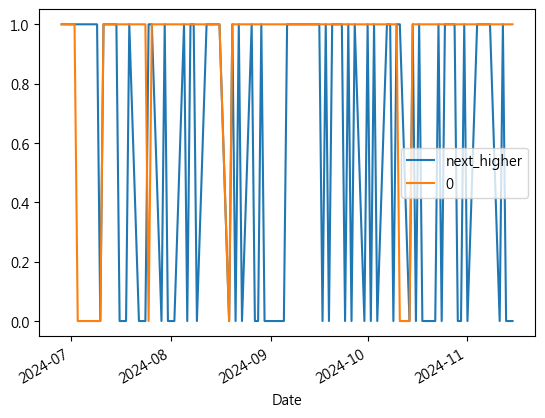

In [67]:
combined.plot()

In [47]:
def predict(train,test,predictors,model):
    model.fit(train[predictors], train["next_higher"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index,name="Predicitions")
    combined=pd.concat([test["next_higher"], preds], axis=1)
    return combined

def backtest(data, predictors, model, start=10, step=1):
    all_predictions =[]
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)


In [48]:
predictions=backtest(data, predictors, model)

In [49]:
predictions["Predicitions"].value_counts()

1    345
0    200
Name: Predicitions, dtype: int64

In [50]:
precision_score(predictions["next_higher"], predictions["Predicitions"])

0.5710144927536231

In [51]:
predictions["next_higher"].value_counts()/predictions.shape[0]



1    0.590826
0    0.409174
Name: next_higher, dtype: float64